In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv('./Data/cleaned_cc_data.csv')
df.head()

cc_data_scaled = StandardScaler().fit_transform(df[["LIMIT_BAL", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]])
# Use original column names for the scaled data and concatenate with the columns left out from scaling
cc_data_scaled = pd.DataFrame(cc_data_scaled, columns=["LIMIT_BAL", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"])
cc_data_scaled = pd.concat([cc_data_scaled, df[["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","default.payment.next.month"]]], join='inner',  axis=1)
cc_data_scaled.head()



,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default.payment.next.month
0,-1.135512,1.791873,1.776654,-0.697265,-0.666863,-1.527923,-1.486255,-0.641203,-0.646339,-0.667135,...,-0.667135,-0.671740,-0.662877,-0.652876,20000.0,2,2,1,24,1
1,-0.365937,-0.876018,1.776654,0.136226,0.186234,0.232334,1.985406,-0.657981,-0.665755,-0.638302,...,-0.638302,-0.620771,-0.605957,-0.598087,120000.0,2,2,2,26,1
2,-0.596810,0.013279,0.109462,0.136226,0.186234,0.232334,0.249576,-0.296016,-0.492299,-0.480945,...,-0.480945,-0.448499,-0.416610,-0.391631,90000.0,2,2,2,34,0
3,-0.904640,0.013279,0.109462,0.136226,0.186234,0.232334,0.249576,-0.054075,-0.009999,0.035991,...,0.035991,-0.230680,-0.185780,-0.156445,50000.0,2,2,1,37,0
4,-0.904640,-0.876018,0.109462,-0.697265,0.186234,0.232334,0.249576,-0.577089,-0.610131,-0.158677,...,-0.158677,-0.345548,-0.347449,-0.331449,50000.0,1,2,1,57,0


In [3]:
cc_data_scaled.value_counts('default.payment.next.month')

default.payment.next.month
0    22996
1     6605
Name: count, dtype: int64

In [4]:
# Split the features and target using default.payment.next.month as the target
X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']
target_names = ['No Default', 'Default']


In [5]:
# Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [6]:
# Import Gradient Boosting classifier .
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=1).fit(X_train, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.8238288288288288
Testing Score: 0.8262396973381976


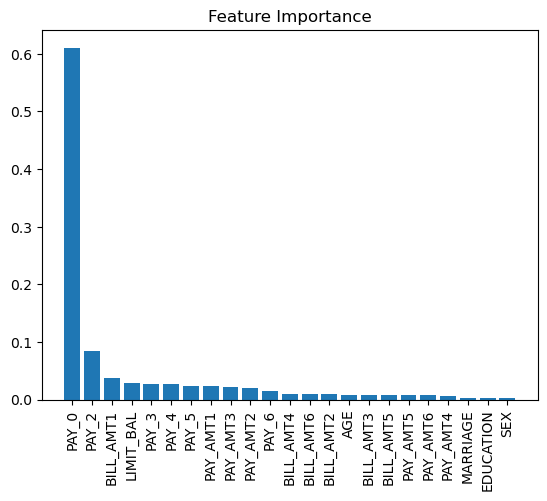

In [10]:
import matplotlib.pyplot as plt

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()
